In [1]:
import numpy as np, import_ipynb
import matplotlib.pyplot as plt
from feedforwardneuralnetwork import FeedForwardNeuralNetwork

importing Jupyter notebook from feedforwardneuralnetwork.ipynb


In [2]:
train = np.loadtxt( 'mnist_train.csv', delimiter = ',', skiprows = 1 )

In [3]:
len( train )

60000

In [4]:
train[ 0, 0 ]

5.0

In [5]:
train[ 0, 1 : ].shape

(784,)

In [6]:
max( train[ 0, 1 : ] )

255.0

In [7]:
train[ :, 1 : ] = train[ :, 1 : ] / 255

In [8]:
img = np.reshape( train[ 0, 1 : ], newshape = ( 28, 28 ) )

In [9]:
for i in range( img.shape[ 0 ] ) :
    for j in range( img.shape[ 1 ] ) :
        n = img[ i, j ]
        if n > 0.0 :
            color = 94
        else :
            color = 0
        print( '\x1b[{c}m{n}\x1b[0m'.format( c = color, n = round( n, 1 ) ), end = ' '  )
    print()

0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.1 0.5 0.5 0.7 0.1 0.7 1.0 1.0 0.5 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.1 0.4 0.6 0.7 1.0 1.0 1.0 1.0 1.0 0.9 0.7 1.0 0.9 0.8 0.3 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.2 0.9 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.4 0.3 0.3 0.2 0.2 0.0 0.0 0.0 0.0 0.0 
0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.1 0.9 1.0 1.0 1.0 1.0 1.0 0.8 0.7 1.0 0.9 0.0 0.0 0.0 0.0 0.0 0.0 

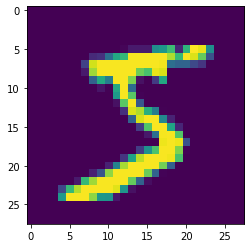

In [10]:
plt.imshow( img )
plt.show()

In [11]:
X = train[ :, 1 : ]
X.shape

(60000, 784)

In [12]:
Y = np.ndarray( shape = ( len( train ), 10 ), dtype = np.float )

In [13]:
for i, n in np.ndenumerate( train[ :, 0 ] ) :
    vect = np.array( [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ], dtype = np.float )
    vect[ int( n ) ] = 1.0
    Y[ i ] = vect

In [14]:
Y.shape

(60000, 10)

In [15]:
Y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [16]:
FFNN = FeedForwardNeuralNetwork( perceptrons_per_hidden_layer = [ 30 ] )

In [17]:
FFNN.train( X, Y, learning_rate = 0.1, batch_size = 10, max_epoch = 1 )

Maximum epoch encountered.


In [18]:
FFNN.score

11858.217835164638

In [19]:
FFNN.forwardpropagation( X )

array([[3.68190019e-02, 3.04793229e-03, 1.14180614e-02, ...,
        1.14398759e-02, 1.48019900e-02, 9.96236313e-03],
       [9.68669337e-01, 5.10112744e-04, 1.11941947e-02, ...,
        2.06488595e-02, 1.31424095e-02, 8.93050152e-03],
       [1.53249480e-03, 4.46597214e-03, 1.48721545e-02, ...,
        8.97659511e-03, 9.28856465e-03, 9.24143534e-02],
       ...,
       [2.17270884e-02, 2.29241692e-03, 8.71677326e-04, ...,
        1.34413353e-02, 2.53104575e-01, 4.11411124e-02],
       [2.74843800e-01, 2.89710867e-03, 1.31578365e-02, ...,
        1.05082811e-02, 4.97327512e-04, 3.32313839e-03],
       [8.26878229e-02, 9.95273726e-03, 4.35658681e-02, ...,
        1.69109188e-02, 7.86059399e-01, 1.86383803e-01]])

In [20]:
class FeedForwardNeuralNetwork( FeedForwardNeuralNetwork ) :
    
    def output( self, input_array ) :
        def index_of_largest_number_in( array ) :
            max_idx, max_num = 0, 0.0
            for i in range( len( array ) ) :
                if array[ i ] > max_num :
                    max_idx, max_num = i, array[ i ]
            return max_idx
        def output_with_confidence( array ) :
            idx = index_of_largest_number_in( array )
            return idx, round( 100 * array[ idx ] / array.sum(), 2 )
        if input_array.shape[ 0 ] == 1 or len( input_array.shape ) == 1 :
            img = np.reshape( input_array, newshape = ( 28, 28 ) )
            plt.imshow( img )
            plt.show()
            return output_with_confidence( 
                self.forwardpropagation( input_array ) 
                )
        return np.apply_along_axis( 
            func1d = output_with_confidence, 
            axis = 1, 
            arr = self.forwardpropagation( input_array ) 
            )

In [21]:
FFNN = FeedForwardNeuralNetwork( perceptrons_per_hidden_layer = [ 30 ] )

In [22]:
FFNN.train( X, Y, learning_rate = 0.1, batch_size = 10, max_epoch = 1 )

Maximum epoch encountered.


In [23]:
FFNN.score

11923.037297194389

In [24]:
test = np.loadtxt( 'mnist_test.csv', delimiter = ',', skiprows = 1 )

In [25]:
len( test )

10000

In [26]:
test[ :, 1 : ] = test[ :, 1 : ] / 255

In [27]:
X = test[ :, 1 : ]
X.shape

(10000, 784)

In [28]:
Y = test[ :, 0 ]

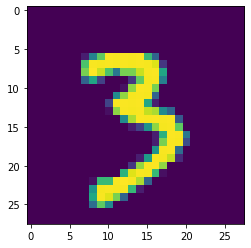

(3, 79.28)

In [29]:
FFNN.output( X[30] )

In [30]:
Y[30]

3.0

In [39]:
X = np.concatenate( ( train[ :, 1 : ], test[ :, 1 : ] ) )

In [40]:
X.shape

(70000, 784)

In [91]:
total = np.concatenate( ( train[ :, 0 ], test[ :, 0 ] ) )

In [92]:
Y = np.ndarray( shape = ( len( total ), 10 ), dtype = np.float )

In [93]:
for i, n in np.ndenumerate( total ) :
    vect = np.array( [ 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0 ], dtype = np.float )
    vect[ int( n ) ] = 1.0
    Y[ i ] = vect

In [94]:
Y.shape

(70000, 10)

In [45]:
Y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [100]:
class FeedForwardNeuralNetwork( FeedForwardNeuralNetwork  ) :
    
    def kfold_cross_validation( self, X, Y, k, 
                                learning_rate = 1.0, convergence = 0.01, 
                                batch_size = 10, max_epoch = 200, max_time = 60 ) :
        accuracy = 0.0
        split = len( X ) // int( k )
        shuffle = np.random.permutation( len( X ) )
        X, Y = X[ shuffle ], Y[ shuffle ]
        indices = np.arange( start = 0, stop = len( X ) )
        for i in range( int( k ) ) :
            train_left, test_indices, train_right = np.array_split( indices, [ i*split, ( i + 1 )*split ] )
            train_indices = np.concatenate( ( train_left, train_right ) )
            self.train( X[ train_indices ], Y[ train_indices ], 
                        learning_rate, convergence, batch_size, max_epoch, max_time )
            accuracy += ( self.output( X[ test_indices ] )[ :, 0 ] == np.where( Y[ test_indices ] == 1 )[ 1 ] ).mean()
        # average accuracy over k iterations
        print( '{} fold cross validation'.format( k ) )
        print( 'Accuracy: {}'.format( accuracy / k ) )
        return

In [101]:
FFNN = FeedForwardNeuralNetwork( perceptrons_per_hidden_layer = [ 30 ] )

In [102]:
FFNN.kfold_cross_validation( X, Y, k = 5, learning_rate = 0.1, batch_size = 10, max_epoch = 30 )

Maximum epoch encountered.
Maximum epoch encountered.
Maximum epoch encountered.
Maximum epoch encountered.
Maximum epoch encountered.
5 fold cross validation
Average accuracy: 0.8872857142857142
